In [1]:
import pandas as pd

df = pd.read_csv("comedian_data.csv")

df

Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES

In [2]:
df.shape

(13, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          13 non-null     int64 
 1   Experience   13 non-null     int64 
 2   Rank         13 non-null     int64 
 3   Nationality  13 non-null     object
 4   Go           13 non-null     object
dtypes: int64(3), object(2)
memory usage: 488.0+ bytes


In [4]:
df.groupby("Nationality").groups.keys()

dict_keys(['N', 'UK', 'USA'])

In [5]:
nation_dict = {
    "UK"  : 0,
    "USA" : 1,
    "N"   : 2
}

df["Nationality"] = df["Nationality"].map(nation_dict)
df.groupby("Nationality").groups.keys()

dict_keys([0, 1, 2])

In [6]:
df.groupby("Go").groups.keys()

dict_keys(['NO', 'YES'])

In [7]:
go_dict = {
    "YES" : 1,
    "NO" : 0
}

df["Go"] = df["Go"].map(go_dict)
df.groupby("Go").groups.keys()

dict_keys([0, 1])

In [8]:
df.sample(5)

Age  Experience  Rank  Nationality  Go
2    23           4     6            2   0
11   18           3     7            0   1
6    66           3     7            2   1
8    52          13     7            2   1
4    43          21     8            1   1

In [9]:
# feature data is what we evalaute to make predictions
# target data is what we generate with predictions

# separate features and target data
feature_cols = [
    "Age",
    "Experience",
    "Rank",
    "Nationality"
]
feature_df = df[feature_cols]
feature_df.sample(5)

Age  Experience  Rank  Nationality
1    42          12     4            1
11   18           3     7            0
2    23           4     6            2
7    35          14     9            0
8    52          13     7            2

In [10]:
target_cols = ["Go"]
target_df = df[target_cols]
target_df.sample(5)

Go
3   0
4   1
7   1
2   0
5   0

[Text(0.4, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'Age <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

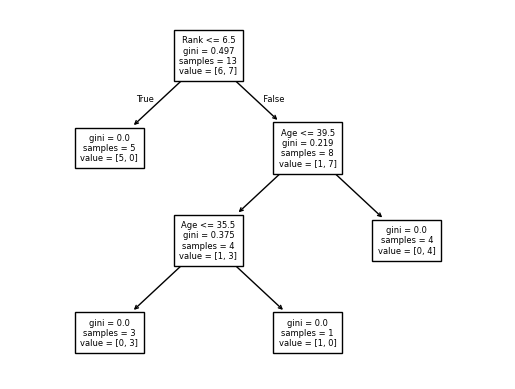

In [11]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree = dtree.fit(feature_df.values, target_df.values)

tree.plot_tree(dtree, feature_names=feature_cols, fontsize=6)

- At each stage of the graph we can see the decision split along with the value = [No, Go]
- The graph updates based on when I run the code...
- In general it seems to suggest:
    - No to low Ranks
    - Yes to higher Ranks
    - Age under 36 is go
    - Age over 40 is go
    - Experience less than 10 is often go


In [12]:
df

Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1

In [13]:
latest_comedian = {
    "Age": 40,
    "Experience": 10,
    "Rank": 7,
    "Nationality": "USA"
}

def comedian_dict_to_list(comedian_dict, nation_dict):
    age = comedian_dict["Age"]
    exp = comedian_dict["Experience"]
    rank = comedian_dict["Rank"]
    nation = nation_dict[comedian_dict["Nationality"]]

    return [age, exp, rank, nation]

print(comedian_dict_to_list(latest_comedian, nation_dict))

[40, 10, 7, 1]


In [14]:
print(f"Will I visit? {dtree.predict([comedian_dict_to_list(latest_comedian, nation_dict)]) == [1]}")

Will I visit? [ True]


In [15]:
test_comedian = latest_comedian
test_comedian["Rank"] = 6
print(comedian_dict_to_list(test_comedian, nation_dict))

print(f"Will I visit? {dtree.predict([comedian_dict_to_list(test_comedian, nation_dict)]) == [1]}")

[40, 10, 6, 1]
Will I visit? [False]
